# EDA on biathlon races data.

Period: 2001-2020
Cup: World championship
Race type: Pursuit

In this notebook I'll explore the data of biathlon races gathered via `biathlon.ipynb`. I'll also be doing a bit of data cleaning and feature engineering. 

In [1]:
#importing necessary libraires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# sns plot settings
sns.set(style='white', rc={"figure.figsize":[15,5]})

#setting pandas IndexSclice
idx = pd.IndexSlice

The data is stored in `pursuit_data.csv`

In [3]:
# reading the data

df = pd.read_csv('pursuit_data.csv')
df.head()

,race_type,race_location,race_day,race_time,rank,bib,name,country,start_behind,prone1,prone2,stand1,stand2,err_total,result_time,cup_points,pdf_path,race_id,gender,race_country
0,MEN 12.5 KM PURSUIT,khanty-mansiysk,2016-03-19,18:30,1,2,SCHEMPP Simon,GER,0:01,1.0,1.0,0.0,1.0,3.0,33:27.8,60.0,race_data/pursuit/BT_C73D_1.0 - 2020-08-13T195...,0,male,RUS
1,MEN 12.5 KM PURSUIT,khanty-mansiysk,2016-03-19,18:30,2,7,BOE Johannes Thingnes,NOR,1:02,0.0,0.0,0.0,1.0,1.0,+8.5,54.0,race_data/pursuit/BT_C73D_1.0 - 2020-08-13T195...,0,male,RUS
2,MEN 12.5 KM PURSUIT,khanty-mansiysk,2016-03-19,18:30,3,5,LESSER Erik,GER,0:38,0.0,0.0,1.0,1.0,2.0,+15.7,48.0,race_data/pursuit/BT_C73D_1.0 - 2020-08-13T195...,0,male,RUS
3,MEN 12.5 KM PURSUIT,khanty-mansiysk,2016-03-19,18:30,4,11,WEGER Benjamin,SUI,1:15,0.0,0.0,0.0,0.0,0.0,+18.7,43.0,race_data/pursuit/BT_C73D_1.0 - 2020-08-13T195...,0,male,RUS
4,MEN 12.5 KM PURSUIT,khanty-mansiysk,2016-03-19,18:30,5,8,DOLL Benedikt,GER,1:03,1.0,0.0,1.0,0.0,2.0,+27.3,40.0,race_data/pursuit/BT_C73D_1.0 - 2020-08-13T195...,0,male,RUS


In [4]:
#overview of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17238 entries, 0 to 17237
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   race_type      17238 non-null  object 
 1   race_location  17238 non-null  object 
 2   race_day       17238 non-null  object 
 3   race_time      17238 non-null  object 
 4   rank           17238 non-null  int64  
 5   bib            17238 non-null  int64  
 6   name           17238 non-null  object 
 7   country        17238 non-null  object 
 8   start_behind   17238 non-null  object 
 9   prone1         16557 non-null  float64
 10  prone2         16516 non-null  float64
 11  stand1         16400 non-null  float64
 12  stand2         16178 non-null  float64
 13  err_total      16178 non-null  float64
 14  result_time    16080 non-null  object 
 15  cup_points     10440 non-null  float64
 16  pdf_path       17238 non-null  object 
 17  race_id        17238 non-null  int64  
 18  gender

  
  
We see that we have relatively small dataset of 17k rows and 20 columns. There are a few missing values aswell. I'll deal with them later. For now lets explore each column one-by-one.

## Race type, location and chronology

In [5]:
df['race_type'].value_counts()

MEN 12.5 KM PURSUIT      4553
MEN 12.5 km PURSUIT      3718
WOMEN 10 km PURSUIT      3703
WOMEN 10 KM PURSUIT      3069
WOMEN 10km PURSUIT       1550
MEN'S 12.5 KM PURSUIT     118
MEN 12.5km PURSUIT        115
Women's 10km Pursuit      114
MEN'S 12.5 km PURSUIT      60
WOMEN'S 10 KM PURSUIT      60
Men's 12.5km Pursuit       60
WOMEN'S 10 km PURSUIT      60
Men's 12.5 km Pursuit      58
Name: race_type, dtype: int64

Since we know that this dataset focuses only on pursuit-type races we'll be removing `race_type` column. We also will be removing `pdf_path` column which contains paths to original pdf files used for gathering raw data. It is useless for the analysis, but was handy for debugging.

In [6]:
df.drop(columns=['race_type', 'pdf_path'], inplace=True)

In [7]:
# let's explore 'race_location' column

df['race_location'].value_counts()

hochfilzen                        2105
holmenkollen                      1881
pokljuka                          1410
ruhpolding                        1171
östersund                         1130
kontiolahti                       1055
oberhof                           1050
antholz-anterselva                 977
oestersund                         882
khanty-mansiysk                    708
nove mesto                         583
antholz - anterselva               401
brezno-osrblie                     360
annecy                             349
chiemgau arena                     240
lahti                              240
antholz obertal                    239
alpensia biathlon center           238
soldier hollow                     228
presque isle                       225
verizon sports complex             120
trondheim                          120
nordic ski centre                  120
beitostolen                        120
biathlon stadion am grenzadler     120
maine winter sports cente

This column shows where the race took place. However, I've noticed that some values look identical in meaning, but spelled differently, which is a bug in data gathering process. For convinience let's assume that specific stadium/venue isn't adding any meaningful infomation since we have `race_country` column.

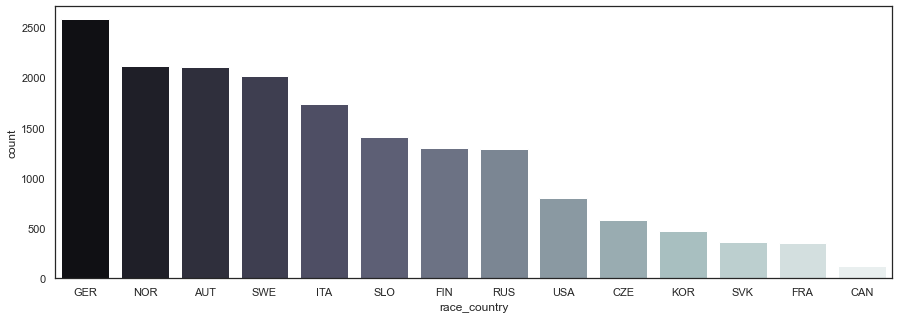

In [8]:
sns.countplot(x=df['race_country'],
              palette='bone',
              order=df['race_country'].value_counts().index
             );

We can see that most races take place in 5 countries: Germany, Norway, Austria, Sweden and Italy. Now I'm curious if we see same distribution of countires represented by biatletes. WIll german biathletes dominate the scene since biatlon is so popular in their country? Does competing on home turf help beathletes achieve greater performance? These are interesting questions that I'll try to answer later in the analysis.

Next up we have `race_day` and `race_time` columns with `object`(string) data type. Looking at first bunch of rows (`df.head()`) we see that these column are perfect for concatenating and converting to `datetime` data type for easier manipulation. 

In [9]:
df['race_datetime'] = pd.to_datetime(df['race_day'] + ' ' +  df['race_time'])
df.drop(columns=['race_day', 'race_time'], inplace=True)
df['race_datetime'].dtype

dtype('<M8[ns]')

Now we getting desirable `type('<M8[ns]')` data type for timeseries elements. Let's take a closer look at it.

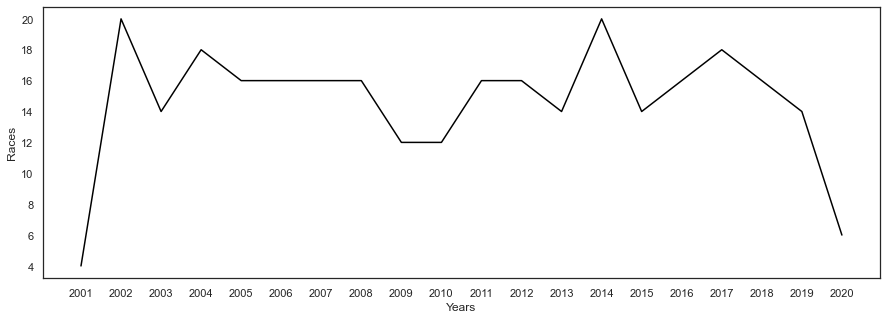

In [10]:
# extracting year, month and weekday_name from `race_datetime`
df['year'] = df['race_datetime'].dt.year
df['month'] = df['race_datetime'].dt.month
df['weekday'] = df['race_datetime'].dt.day_name()

#plotting # of races each year in the dataset
sns.lineplot(data=df.groupby('year')['race_id'].nunique(),
             color='black',
            )
#explicitly setting xticks to show years instead of decimals like 2002.5
plt.xticks(df.groupby('year')['race_id'].nunique().index.tolist())
plt.xlabel('Years')
plt.ylabel('Races');

The graph above verifies that the dataset contains races from 2001-2002 to 2019-2020 seasons. 2001 and 2020 have fewer races than other years and thats OK due to the nature of biathlon seasons. Also we see that we can expect 14 to 18 races in a year. What is also interesting for me is how the tournament holding countries popularity changed over the years. Let's plot it.

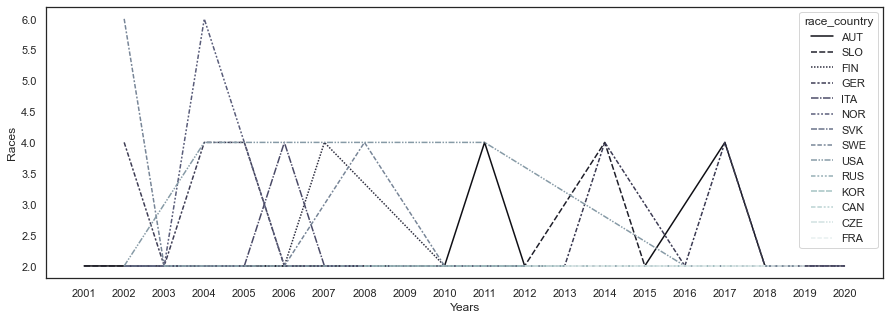

In [11]:
#plotting how many races each country got over the years
sns.lineplot(data=df.groupby(['year', 'race_country'])['race_id'].nunique().reset_index('race_country'),
             x='year',
             y='race_id',
             hue='race_country',
             style='race_country',
             palette='bone'
            )

#explicitly setting xticks to show years instead of decimals like 2002.5
plt.xticks(df.groupby('year')['race_id'].nunique().index.tolist())
plt.xlabel('Years')
plt.ylabel('Races');

This graph is messy, but we can clearly see that since 2006 each country gets from 2 to 4 pursuit races over the season, which was not the case in 2002-2004 when Norway and Germany were go-to placew for biathlon spectators.

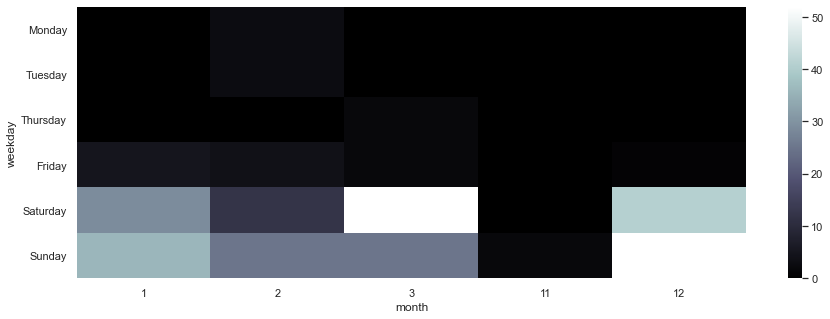

In [12]:
# crating a slice of dataframe with weekdays and monts as indexes and # of races as values
month_day_count = df.groupby(['weekday', 'month'])['race_id'].nunique().to_frame()
# shaping new dataframe to rectangular
month_day_count = month_day_count.reset_index().pivot(index='weekday', 
                                                      columns='month', 
                                                      values='race_id'
                                                     ).fillna(0)
# creating sorting key for weekdays to avoid default sort
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
month_day_count = month_day_count.sort_index(key=lambda x:x.map(mapping))

#plotting heatmap
sns.heatmap(data=month_day_count, cmap='bone');

It is obvious that majority of the pursuit races happen during weekend, firstly because they are (in my opinion) more thrilling than let's say individual or sprint races and, secondly, the starting order in pursuit races is depens on the oucome of sprint races

## Biathlete performance

- who's the best? fastest? most accurate? most cup points? over time? home turf importance? is being 1st to start an undeniable advantage?
- what countries are represented? which are more successful?

### Hall of fame
Of course when we talk about competetive fiels our first question is "Who is the best?"). It's very easy to find out.

In [13]:
## creating new dataframe `most_rank1` for plotting "hall of fame"
#counting how many rank == 1 each biathlete have had
most_rank1 = df.loc[df['rank'] == 1][['name', 'gender', 'race_id']].groupby(['gender', 'name']).count()
#sorting values within each gender group
most_rank1 = most_rank1.sort_values(by=['gender', 'race_id'], ascending=False).reset_index('gender')
#selecting top 5 biathletes from each gender group
most_rank1 = most_rank1.groupby('gender').head().reset_index()
# concatenating country of a biathlete to his name
name_conc_df = df.loc[df['name'].isin(most_rank1['name'])][['name', 'country']].groupby('name').head(1)
name_concatenator = lambda x: x + ' ({})'.format(name_conc_df.loc[name_conc_df['name'] == x].country.iloc[0])
most_rank1['name'] = most_rank1['name'].apply(name_concatenator)

#lets take a look at resulting dataframe
most_rank1

,name,gender,race_id
0,FOURCADE Martin (FRA),male,30
1,BJOERNDALEN Ole Einar (NOR),male,29
2,BOE Johannes Thingnes (NOR),male,12
3,SVENDSEN Emil Hegle (NOR),male,11
4,POIREE Raphael (FRA),male,10
5,MAKARAINEN Kaisa (FIN),female,13
6,DAHLMEIER Laura (GER),female,11
7,DOMRACHEVA Darya (BLR),female,11
8,BAILLY Sandrine (FRA),female,9
9,BERGER Tora (NOR),female,9


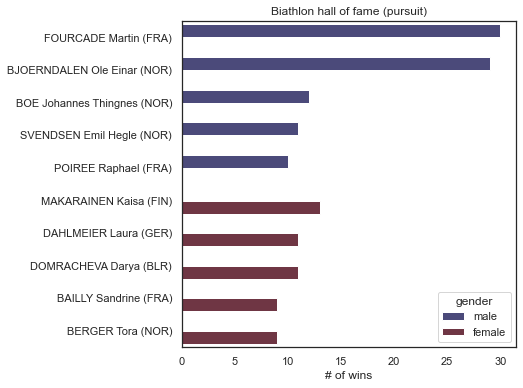

In [14]:
#plotting biathlon hall of fame
f, ax = plt.subplots(figsize=(6,6))
sns.barplot(data=most_rank1,
            x='race_id',
            y='name',
            hue='gender',
            palette='icefire'
           )
plt.title('Biathlon hall of fame (pursuit)')
plt.xlabel('# of wins')
plt.ylabel('');

Okay, meet the two male biathlon legends - Martin Fourcade and Ole Einar Bjoerndalen splitting almost 60 wins beetween them, out of 147 races! Entire male top 5 is dominates by 2 countries - France and Norway. Females, however, share much more competitive field since nobody have more that 15 gold medals. But what about countries? I'd like to see top 10 countries measured by number of medals achieved.

In [15]:
##preparing data for plotting
#counting how many medals each country won
cg_top = df.loc[df['rank'].isin([1, 2, 3])][['country', 'gender', 'rank', 'race_id']]
cg_top = cg_top.groupby(['gender', 'country', 'rank']).count()
#reshaping data, renaming columns, calculating total columns
cg_top = cg_top.unstack().fillna(0)
cg_top.columns = ['gold', 'silver', 'bronze']
cg_top['total'] = cg_top.sum(axis=1)
cg_top = cg_top.sort_values(by=['gender', 'total'], ascending=False)

#removing gender group from cg_top dataframe for plotting purposes, selecting top10 countries
total_medals_by_country = cg_top.reset_index(level='gender', drop=True).groupby('country').sum().sort_values(by='total', ascending=False)
top_countries = total_medals_by_country.head(10)

#taking top 10 rows of each gender group
top_by_gender = cg_top.groupby(['gender']).head(10)

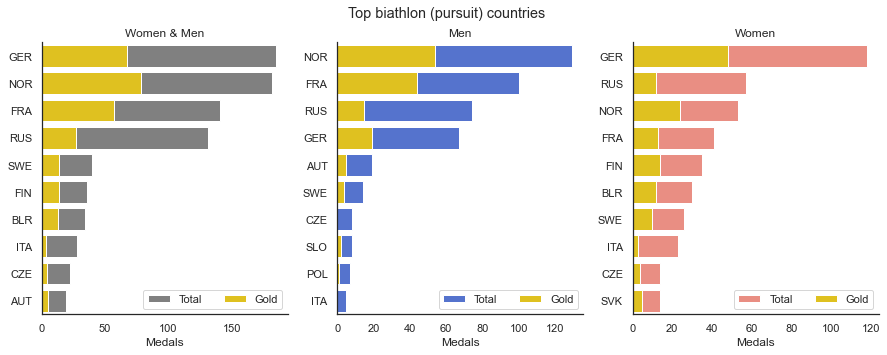

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#plot total medals, both genders
sns.barplot(data=top_countries, x='total', y=top_countries.index,
            color='grey', label='Total', ax=axes[0]
           )
#plot gold medals, both genders
sns.barplot(data=top_countries, x='gold', y=top_countries.index,
            color='gold', label='Gold', ax=axes[0]
           )
#same plot as above, but for men
sns.barplot(data=top_by_gender.loc[idx['male', :],:], x='total', 
            y=top_by_gender.loc[idx['male', :],:].index.get_level_values(1),
            color='royalblue', label='Total', ax=axes[1]
           )
sns.barplot(data=top_by_gender.loc[idx['male', :],:], x='gold', 
            y=top_by_gender.loc[idx['male', :],:].index.get_level_values(1),
            color='gold', label='Gold', ax=axes[1]
           )
#same plot as above, but for women
sns.barplot(data=top_by_gender.loc[idx['female', :],:], x='total', 
            y=top_by_gender.loc[idx['female', :],:].index.get_level_values(1),
            color='salmon', label='Total', ax=axes[2]
           )
sns.barplot(data=top_by_gender.loc[idx['female', :],:], x='gold', 
            y=top_by_gender.loc[idx['female', :],:].index.get_level_values(1),
            color='gold', label='Gold', ax=axes[2]
           )

# Add a legend and informative axis label for each subplot
for i,j in enumerate(['Women & Men', 'Men', 'Women']):
    axes[i].legend(ncol=2, loc='lower right', frameon=True)
    axes[i].set(ylabel='',
                xlabel='Medals',
                title=j
               )
fig.suptitle('Top biathlon (pursuit) countries')
sns.despine(left=False, bottom=False)


It is clear now that biathlon scene dominated by 4 countries - Germany, Norway, France, Russia. 
There are few differences based on gender:
- Finland and Belarus have stronger female contenders.
- Austria is in the top-10 overall because of male winnings.

The question is, can this prevalence be simply caused by overrepresentation of these countries?

In [17]:
#finding out how many biathles represented each country
player_repr = df.groupby('country')['name'].nunique().sort_values(ascending=False).to_frame()
player_repr.columns = ['biathletes']

#joining with how many medals each country won
country_win_playerrepr = player_repr.join(total_medals_by_country['total'], how='left').fillna(0)

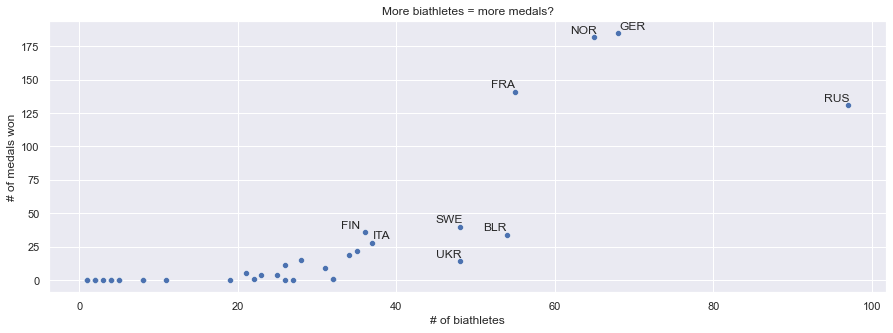

In [18]:
#plotting the relationship between total biathletes and medals won per country
sns.set_style('darkgrid')
sns.scatterplot(data=country_win_playerrepr,
                x='biathletes',
                y='total',
                markers=True
               )
#show some data-point labels for clarity
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    counter = 0
    for i, point in a.iterrows():
        if counter == 9:
            break
        if str(point['val']) == 'GER' or str(point['val']) == 'ITA': #avoid overlaps in data-point labels
            ax.text(point['x']+.1, point['y']+3, str(point['val']))
        else:
            ax.text(point['x']-3, point['y']+3, str(point['val']))
        counter += 1

label_point(country_win_playerrepr.reset_index().biathletes,
            country_win_playerrepr.reset_index().total,
            country_win_playerrepr.reset_index().country, 
            plt.gca()
           )

plt.title('More biathletes = more medals?')
plt.xlabel('# of biathletes')
plt.ylabel('# of medals won');

Looks like # of biatletes and # of medals per country are positively correlated. And we can see that some countries with same # of biathletes can drastically wary in performance (SWE > UKR, FRA > BEL) which suggests that there are difference in skill level and/or really talented personalities.
<br><br>However, I showed overall biathletes, maybe some countries are rotating people frequently and some are not. The correct way here is to look at each race chronologically and exlore trends in how many biathletes countries bring to each race. For clarity, I'll be looking at 9 countries: top cluster (FRA, NOR, RUS, GER) and middle cluster (SWE, BLR, UKR, ITA, FIN).

In [19]:
#slicing data
chron_country_repr = df.groupby(['race_datetime', 'race_id', 'country'])['name'].nunique()
chron_country_repr = chron_country_repr.reset_index()


#taking race_id's and changing them to number of chronoligic appearance
#for example race 1,2,3 have id's 198, 50, 102 will be changed to 1,2,3
def chronologic_rid(row):
    for i, item in enumerate(list(chron_country_repr['race_id'].unique()), 1):
        if row == item:
            row = i
            break    
    return row
chron_country_repr['race_id'] = chron_country_repr['race_id'].apply(chronologic_rid)

#selecting only 9 countries
ch_co_repr = chron_country_repr.loc[chron_country_repr['country'].isin(['NOR', 'FRA', 'RUS', 'GER', 
                                                                        'FIN', 'BLR', 'UKR', 'ITA', 'SWE'])]

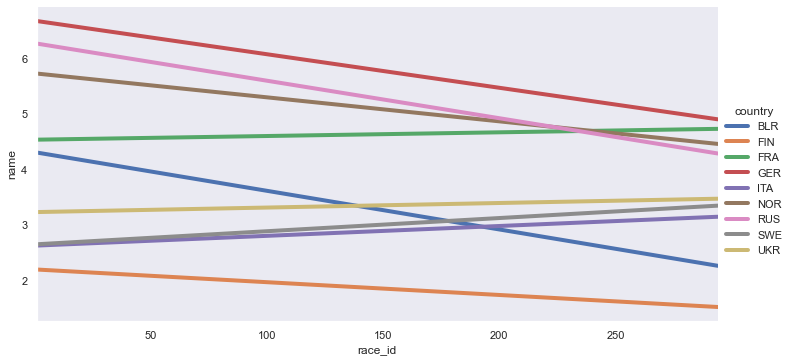

In [20]:
#plotting the regeression lines
#each trend line shows how the number of biathletes changed over time for each country
sns.set_style('dark')
sns.lmplot(data=ch_co_repr, x='race_id', y='name', hue='country',
           height=5, aspect=2, ci=None, line_kws={'lw':4}, scatter=False
          );

Based on the plot above it is safe to say that our assumption was correct - countries with larger number of biathletes in a given race win more medals overall. Also our clusters of top and middle countries are present in this graph too. The nature of pursuit race is that the start list (who will participate) is depends on the results of individual-type races. It would require data for those type of races to explore this further which I currently don't have.

### Accuracy & speed

Time for feature engineering: we have data for how many times each biathlete miss, but that in itself doesn't say much. I'd like to calculate shooting accuracy and ski speed for each biathlete.

In [21]:
##setting up pd.apply funcs
#converting [p1,p2,s1,s1] firing attempts to shots
def to_shots(row):
    if pd.isna(row):
        row = 0
    else:
        row = 5
    return row

In [22]:
#calculating shots for each type of shooting
df['tot_shots'] = df[['prone1', 'prone2', 'stand1', 'stand2']].applymap(to_shots).sum(axis=1)
df['p1_shots'] = df['prone1'].apply(to_shots)
df['p2_shots'] = df['prone2'].apply(to_shots)
df['tot_p_shots'] = df['p1_shots'] + df['p2_shots']
df['s1_shots'] = df['stand1'].apply(to_shots)
df['s2_shots'] = df['stand2'].apply(to_shots)
df['tot_s_shots'] = df['s1_shots'] + df['s2_shots']

#calculating misses for each type of shooting
df['tot_misses'] = df[['prone1', 'prone2', 'stand1', 'stand2']].fillna(0).sum(axis=1).astype('int')
df['p1_misses'] = df['prone1'].fillna(0).astype('int')
df['p2_misses'] = df['prone2'].fillna(0).astype('int')
df['tot_p_misses'] = df['p1_misses'] + df['p2_misses']
df['s1_misses'] = df['stand1'].fillna(0).astype('int')
df['s2_misses'] = df['stand2'].fillna(0).astype('int')
df['tot_s_misses'] = df['s1_misses'] + df['s2_misses']

#calculating in-race accuracies
shot_columns = [
    'tot_shots', 'p1_shots', 'p2_shots', 'tot_p_shots',
    's1_shots', 's2_shots', 'tot_s_shots'
    ]
miss_columns = [
    'tot_misses', 'p1_misses', 'p2_misses', 'tot_p_misses',
    's1_misses', 's2_misses', 'tot_s_misses'
    ]
race_acc_columns = [
    'race_tot_acc', 'race_p1_acc', 'race_p2_acc', 'race_tot_p_acc',
    'race_s1_acc', 'race_s2_acc', 'race_tot_s_acc'
    ]
for t in zip(shot_columns, miss_columns, race_acc_columns):
    df[t[2]] = 1 - (df[t[1]]/df[t[0]])

In [23]:
# Since we have bunch of racers who hadn't finished the race I'll create
# separate binary column 'have_finished'.
df['have_finished'] = (
    df['result_time']
    .apply(lambda x: 'no' if pd.isna(x) else 'yes')
    )

In [24]:
# In next block I'll calculate overall accuracies and accuracy scores
# for each individual biathlete.
oa_acc_columns = [
    'oa_tot_acc', 'oa_p1_acc', 'oa_p2_acc', 'oa_tot_p_acc',
    'oa_s1_acc', 'oa_s2_acc', 'oa_tot_s_acc'
    ]
grouped = df.groupby('name', sort=False)[shot_columns+miss_columns].sum()
for t in zip(shot_columns, miss_columns, oa_acc_columns):
    grouped[t[2]] = 1 - (grouped[t[1]]/grouped[t[0]])

# Filling NaNs with zeroes for rare biathletes who had 0 shots overall or
# in any shooting type (no shots - zero accuracy).
oa_acc_df = grouped.fillna(0).copy()

# Calculating accuracy score (basically weighted accuracy), where: 
# 440 - median of total shots for biathletes who have more than 100 shots
# over their career;
# 0.809 - mean accuracy across all shots.
oa_acc_df['oa_acc_score'] = (
    (oa_acc_df['tot_shots']-oa_acc_df['tot_misses']+440*0.809)
    /(oa_acc_df['tot_shots'] + 440)
    )

In [25]:
# Creating a dataframe with names as index and total medals as values.
medals_df = (
    df.loc[df['rank'].isin([1,2,3]), ('name', 'rank', 'race_id')]
    .groupby('name')['rank'].count()
    .sort_values(ascending=False)
    .rename('medals')
    )
# Creating a view of the data to explore relationship between amount of
# medals won and accuracy score.
medals_acc_df = pd.merge(oa_acc_df, medals_df, how='left', on='name')
subset = (
    medals_acc_df[['oa_acc_score', 'medals']].fillna(0)
    .sort_values(by='oa_acc_score', ascending=False)
)

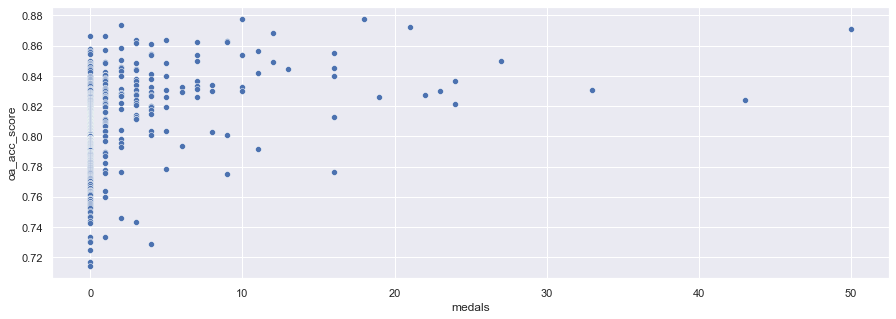

In [26]:
# Plotting.
sns.set(style='darkgrid')
sns.scatterplot(data=subset, x='medals', y='oa_acc_score');

There is no strong correlation between accuracy and winning, however all of the biathletes with more than 20 medals have more than average accuracy. Next I'd like to explore how fast the racers are. 

In [27]:
# Conversion functions
def to_secs(x):
    '''Takes string like 00:01, returns total seconds'''
    if ':' not in x:
        return float(x)
    else:
        mins, secs = x.split(':')[0], x.split(':')[1]
        return (float(mins)*60 + float(secs))

def to_secs_result(x):
    '''Takes strings like '33:27.8+22:16.1' , returns total seconds of sum'''
    if type(x) == str:
        if '+' in x:
            splt = x.split('+')
            return float(format(to_secs(splt[0])+to_secs(splt[1]), '.1f'))
        else:
            return to_secs(x)
    elif np.isnan(x):
        return np.nan
    else:
        return 'invalid'
   

In [28]:
# Calculating time (in seconds) traveled for every row.
grouped = (
    df.groupby('race_id')[['race_id','rank', 'result_time']].head(1)
    .reset_index(drop=True).set_index(['race_id'])['result_time']
    )
df = pd.merge(df, grouped, how='left', on='race_id', suffixes=[None,'_first'])
df.loc[df['rank'] != 1, 'result_time_concat'] = (
    df['result_time_first'] + df['result_time']
    )

In [29]:
df.loc[df['rank'] == 1, 'result_time_concat'] = df['result_time_first']
df['seconds_traveled'] = df['result_time_concat'].apply(to_secs_result)
df = df.drop(['result_time_first', 'result_time_concat'], axis=1)

In [30]:
# Calculating distance traveled (in km). Men track is 12.5km, for women 10km;
# penalty lap is 0.15 km.
df['distance_traveled'] = (
    (df['tot_misses']*0.15) 
    + df['gender'].apply(lambda x: 12.5 if x == 'male' else 10.0)
    )
df.loc[df['have_finished'] == 'no', 'distance_traveled'] = np.nan

# Calculating average speed (meters per second).
df['race_avg_speed'] = df['distance_traveled']*1000 / df['seconds_traveled']

In [36]:
# Calculating overall average speed for each biathlete.
grouped = (
    df.groupby(['gender','name'])
    [['distance_traveled', 'seconds_traveled']].sum()
    .reset_index('gender')
    )
grouped['oa_avg_speed'] = (
    grouped['distance_traveled']*1000
    / grouped['seconds_traveled']
    )
# Store results in oa_avg_speed dataframe.
oa_avg_speed_df = grouped.copy()

In [44]:
oa_avg_speed_df.head()

,gender,distance_traveled,seconds_traveled,oa_avg_speed
name,,,,
ABE Natsuko (TAKAHASHI),female,10.90,2142.3,5.087990
ABRAMOVA Olga,female,126.60,24276.9,5.214834
ADLER Jenny,female,63.15,14016.0,4.505565
AFANASJEVA Viktoria,female,11.20,2667.0,4.199475
AKHATOVA Albina,female,381.55,77588.9,4.917585


Calculations are done, time for plotting. I heard once sports commentator said that it is not fair to compare men and female biathletes speed-wise. Now that I have the data we can visualize distributions of overall average speeds of biathletes with emphasis on gender.

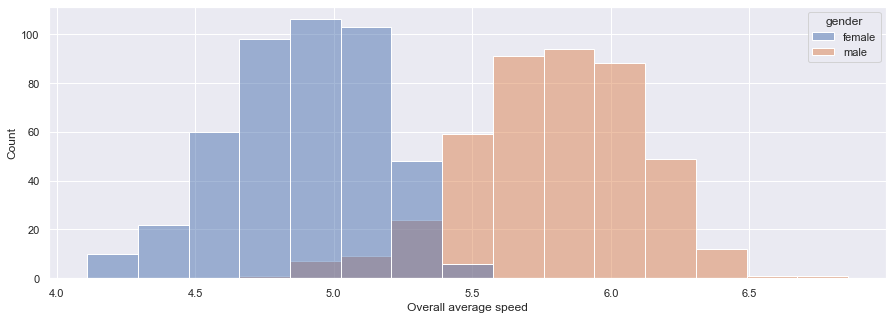

In [41]:
sns.histplot(data=oa_avg_speed_df, x='oa_avg_speed', hue='gender')
plt.xlabel('Overall average speed');

Well, commentator hypotesis is comfirmed. Men, on average, are faster that women in biathlon pursuit races.

In [47]:
performance_df = (
    pd.merge(oa_avg_speed_df, 
             medals_acc_df[['tot_shots', 'tot_misses', 'oa_acc_score', 'medals']],
             how='left', on='name')
    )

In [73]:
performance_df['medals'] = performance_df['medals'].fillna(0)
male_filt = (performance_df['gender'] == 'male')
female_filt = (performance_df['gender'] == 'female')

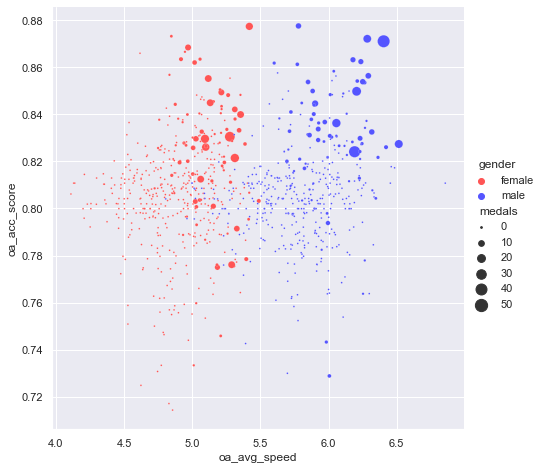

In [93]:
sns.relplot(data=performance_df, x='oa_avg_speed', y='oa_acc_score',
            size='medals', sizes=(3,150), hue='gender', height=6.5, 
            palette='seismic_r');

Now we can see the relationship of all three variables (speed, accuracy, medals won) with respect to gender since we established the difference in average speed between those groups. Interesting thing here is that in male group impoving acuraccy is more important if your speed is above average, but in female group high speed alone can net some wins (see big dots below mean accuracy and to the right of mean speed). We can also say that combination of speed and accuracy can hint us at the biathletes win possibilities.